In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from dateutil.relativedelta import relativedelta

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()


In [2]:
df = pd.read_csv('data/hourly_volume.csv', parse_dates = ['order_hour'])
df.head()


,order_hour,num_orders
0,2016-07-04 00:00:00,0
1,2016-07-04 01:00:00,0
2,2016-07-04 02:00:00,0
3,2016-07-04 03:00:00,0
4,2016-07-04 04:00:00,0


In [3]:
df['weekday'] = df.order_hour.dt.dayofweek
df['hour_padded'] = df.order_hour.dt.hour.astype(str).str.pad(2, fillchar = '0')
df['weekday_hour'] = df.weekday.astype(str) + df.hour_padded
df.head()


,order_hour,num_orders,weekday,hour_padded,weekday_hour
0,2016-07-04 00:00:00,0,0,00,000
1,2016-07-04 01:00:00,0,0,01,001
2,2016-07-04 02:00:00,0,0,02,002
3,2016-07-04 03:00:00,0,0,03,003
4,2016-07-04 04:00:00,0,0,04,004


In [4]:
df.dtypes


order_hour      datetime64[ns]
num_orders               int64
weekday                  int64
hour_padded             object
weekday_hour            object
dtype: object

In [5]:
df.shape


(1200, 5)

In [6]:
df.describe()


,num_orders,weekday
count,1200.000000,1200.0000
mean,475.077500,2.9400
std,603.892403,2.0248
min,-91.000000,0.0000
25%,0.000000,1.0000
50%,0.000000,3.0000
75%,930.250000,5.0000
max,2501.000000,6.0000


In [7]:
df.num_orders.value_counts()


0       650
797       4
879       3
618       3
1509      3
701       3
714       3
1049      3
509       3
935       3
875       2
1210      2
680       2
685       2
1252      2
687       2
1236      2
1233      2
1208      2
996       2
704       2
939       2
718       2
725       2
741       2
674       2
670       2
1314      2
653       2
1333      2
       ... 
1317      1
1320      1
1321      1
1322      1
1211      1
1206      1
1204      1
1201      1
1127      1
1129      1
1130      1
1133      1
1141      1
1142      1
1157      1
1160      1
1161      1
1163      1
1164      1
1177      1
1181      1
1182      1
1184      1
1185      1
1188      1
1189      1
1191      1
1195      1
1196      1
985       1
Name: num_orders, Length: 452, dtype: int64

{'whiskers': [<matplotlib.lines.Line2D at 0x1266053c8>,
 'caps': [<matplotlib.lines.Line2D at 0x1266059e8>,
 'boxes': [<matplotlib.lines.Line2D at 0x1266051d0>],
 'medians': [<matplotlib.lines.Line2D at 0x12657c0b8>],
 'fliers': [<matplotlib.lines.Line2D at 0x12657c390>],
 'means': []}

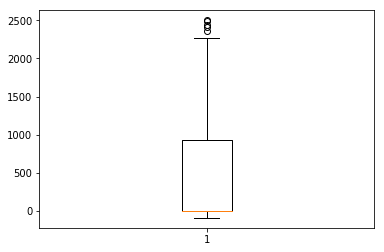

In [8]:
plt.boxplot(df.num_orders)


(array([660.,  30.,  89., 133., 108.,  81.,  57.,  24.,  12.,   6.]),
 array([ -91. ,  168.2,  427.4,  686.6,  945.8, 1205. , 1464.2, 1723.4,
        1982.6, 2241.8, 2501. ]),
 <a list of 10 Patch objects>)

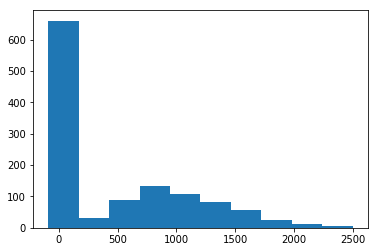

In [9]:
plt.hist(df.num_orders)


In [10]:
df.weekday.value_counts()


0    192
6    168
5    168
4    168
3    168
2    168
1    168
Name: weekday, dtype: int64

In [12]:
df.hour_padded.value_counts()


01    50
10    50
19    50
21    50
06    50
22    50
00    50
23    50
14    50
03    50
20    50
17    50
13    50
05    50
15    50
08    50
07    50
12    50
11    50
18    50
02    50
09    50
16    50
04    50
Name: hour_padded, dtype: int64

In [13]:
df.weekday_hour.value_counts()


012    8
023    8
015    8
022    8
006    8
000    8
003    8
002    8
016    8
021    8
019    8
001    8
007    8
013    8
018    8
004    8
010    8
008    8
011    8
017    8
014    8
005    8
009    8
020    8
506    7
615    7
318    7
218    7
511    7
416    7
      ..
202    7
215    7
421    7
518    7
522    7
514    7
221    7
510    7
423    7
409    7
321    7
109    7
212    7
406    7
213    7
620    7
501    7
407    7
500    7
519    7
312    7
102    7
204    7
305    7
306    7
201    7
112    7
612    7
413    7
611    7
Name: weekday_hour, Length: 168, dtype: int64

In [14]:
df.isna().sum()

order_hour      0
num_orders      0
weekday         0
hour_padded     0
weekday_hour    0
dtype: int64

In [15]:
grouped_df = df.groupby('weekday_hour').agg(np.mean)
grouped_df


,num_orders,weekday
weekday_hour,,
000,0.000000,0.0
001,0.000000,0.0
002,0.000000,0.0
003,0.000000,0.0
004,0.000000,0.0
005,0.000000,0.0
006,0.000000,0.0
007,0.000000,0.0
008,0.000000,0.0


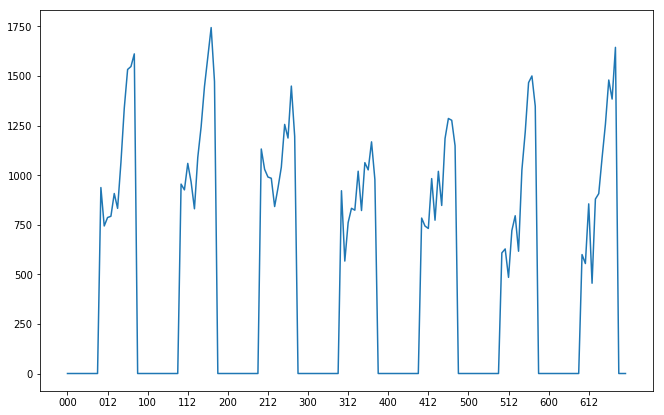

In [16]:
fig, ax = plt.subplots(figsize = (11,7))
ax.plot(grouped_df.index, grouped_df.num_orders)
ax.set_xticks(ax.get_xticks()[::12])
ax.set_xticklabels(grouped_df.index[::12])
plt.show()


In [30]:
days_forward = 2

df['order_hour_date'] = pd.to_datetime(df.order_hour).dt.date
df['forecast_date'] = pd.to_datetime(df.order_hour_date + relativedelta(days = days_forward))
df['forecast_order_hour'] = pd.to_datetime(
    df.forecast_date.astype(str) + ' ' + df.hour_padded + ':00:00', 
    format='%Y-%m-%d %H:%M:%S')
df['forecast_weekday'] = df.forecast_order_hour.dt.dayofweek
df['forecast_hour_padded'] = df.forecast_order_hour.dt.hour.astype(str).str.pad(
    2, fillchar = '0')
df['forecast_weekday_hour'] = df.forecast_weekday.astype(str) + df.forecast_hour_padded

df.head()


,order_hour,num_orders,weekday,hour_padded,weekday_hour,order_hour_date,forecast_date,forecast_order_hour,forecast_weekday,forecast_hour_padded,forecast_weekday_hour
0,2016-07-04 00:00:00,0,0,00,000,2016-07-04,2016-07-06,2016-07-06 00:00:00,2,00,200
1,2016-07-04 01:00:00,0,0,01,001,2016-07-04,2016-07-06,2016-07-06 01:00:00,2,01,201
2,2016-07-04 02:00:00,0,0,02,002,2016-07-04,2016-07-06,2016-07-06 02:00:00,2,02,202
3,2016-07-04 03:00:00,0,0,03,003,2016-07-04,2016-07-06,2016-07-06 03:00:00,2,03,203
4,2016-07-04 04:00:00,0,0,04,004,2016-07-04,2016-07-06,2016-07-06 04:00:00,2,04,204


In [18]:
df.dtypes


order_hour               datetime64[ns]
num_orders                        int64
weekday                           int64
hour_padded                      object
weekday_hour                     object
order_hour_date                  object
forecast_date            datetime64[ns]
forecast_order_hour      datetime64[ns]
forecast_weekday                  int64
forecast_hour_padded             object
forecast_weekday_hour            object
dtype: object

In [19]:
max(df.order_hour)


Timestamp('2016-08-22 23:00:00')

In [26]:
last_ts = max(df.order_hour)
print(last_ts)

df_new = df.loc[
    df['forecast_order_hour'] > last_ts, ['forecast_order_hour', 'forecast_weekday_hour']
].merge(grouped_df[['num_orders']], 
        left_on = 'forecast_weekday_hour', right_index = True, how = 'left'
       )
df_new


2016-08-22 23:00:00


,forecast_order_hour,forecast_weekday_hour,num_orders
1152,2016-08-23 00:00:00,100,0.000000
1153,2016-08-23 01:00:00,101,0.000000
1154,2016-08-23 02:00:00,102,0.000000
1155,2016-08-23 03:00:00,103,0.000000
1156,2016-08-23 04:00:00,104,0.000000
1157,2016-08-23 05:00:00,105,0.000000
1158,2016-08-23 06:00:00,106,0.000000
1159,2016-08-23 07:00:00,107,0.000000
1160,2016-08-23 08:00:00,108,0.000000
1161,2016-08-23 09:00:00,109,0.000000


In [27]:
df_new = df_new[['forecast_order_hour', 'num_orders']]
df_new.columns = ['order_hour', 'predicted_order_volume']

df_new


,order_hour,predicted_order_volume
1152,2016-08-23 00:00:00,0.000000
1153,2016-08-23 01:00:00,0.000000
1154,2016-08-23 02:00:00,0.000000
1155,2016-08-23 03:00:00,0.000000
1156,2016-08-23 04:00:00,0.000000
1157,2016-08-23 05:00:00,0.000000
1158,2016-08-23 06:00:00,0.000000
1159,2016-08-23 07:00:00,0.000000
1160,2016-08-23 08:00:00,0.000000
1161,2016-08-23 09:00:00,0.000000


In [41]:
# 4. Write a function in Python that takes in a dataset (.csv file)
#    and a number of days forward, and generates predictions for hourly
#    order volume.

def forecast_volume(data_file: str, days_forward: int):
    import numpy as np
    import pandas as pd
    from dateutil.relativedelta import relativedelta
    
    df = pd.read_csv(data_file, parse_dates = ['order_hour'])
    
    df['weekday'] = df.order_hour.dt.dayofweek
    df['hour_padded'] = df.order_hour.dt.hour.astype(str).str.pad(2, fillchar = '0')
    df['weekday_hour'] = df.weekday.astype(str) + df.hour_padded

    grouped_df = df.groupby('weekday_hour').agg(np.mean)
    
    df['order_hour_date'] = pd.to_datetime(df.order_hour).dt.date
    df['forecast_date'] = pd.to_datetime(df.order_hour_date + 
                                         relativedelta(days = days_forward))
    df['forecast_order_hour'] = pd.to_datetime(
        df.forecast_date.astype(str) + ' ' + df.hour_padded + ':00:00', 
        format='%Y-%m-%d %H:%M:%S')
    df['forecast_weekday'] = df.forecast_order_hour.dt.dayofweek
    df['forecast_hour_padded'] = df.forecast_order_hour.dt.hour.astype(str).str.pad(
        2, fillchar = '0')
    df['forecast_weekday_hour'] = df.forecast_weekday.astype(str) + df.forecast_hour_padded

    last_ts = df.order_hour

    data_out = df.loc[
    df['forecast_order_hour'] > last_ts, 
        ['forecast_order_hour', 'forecast_weekday_hour']].merge(
        grouped_df[['num_orders']], 
        left_on = 'forecast_weekday_hour', right_index = True, 
        how = 'left')[['forecast_order_hour', 'num_orders']]
    data_out.columns = ['order_hour', 'predicted_order_volume']

    return data_out


In [42]:
forecast_volume('data/hourly_volume.csv', 2)


,order_hour,predicted_order_volume
0,2016-07-06 00:00:00,0.000000
1,2016-07-06 01:00:00,0.000000
2,2016-07-06 02:00:00,0.000000
3,2016-07-06 03:00:00,0.000000
4,2016-07-06 04:00:00,0.000000
5,2016-07-06 05:00:00,0.000000
6,2016-07-06 06:00:00,0.000000
7,2016-07-06 07:00:00,0.000000
8,2016-07-06 08:00:00,0.000000
9,2016-07-06 09:00:00,0.000000
